 # Financial Datasets For Fraud Detection
 ### A synthetic dataset generated by a simulator called PaySim
 https://www.kaggle.com/ntnu-testimon/paysim1

 Reference:<br>
 E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016


First of all, I have to download some packages.

In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [8]:
import random
import warnings
from collections.abc import Iterable
from statistics import mean, median, mode
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
warnings.filterwarnings("ignore")

 # 1. Data Loading
The data has been downloaded from web in advance, stored in `payment_data.csv`.\
Firstly, I write code to import data and correct spelling of original column headers for consistency because I found some typos in the original column names.

In [40]:
payment = pd.read_csv('payment_data.csv')
payment = payment.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig',
                                  'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
payment.head()


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [657]:
payment.tail()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [658]:
payment

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


 # 2. Data Description
We can use the `info` method.


In [659]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest          object
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


We can use `dtypes` to see the data type.

In [660]:
payment.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest           object
oldBalanceDest    float64
newBalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

To save time, the description information is pre-prepared; it shows the description of all the numeric data to have an overview.
I still have to do the rename.

In [661]:
describe = pd.read_csv('payment_describe.csv', index_col=0)
describe = describe.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
describe

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


We can also use the `describe` function provided by pandas. And I can get the same result.

In [662]:
payment.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# 3. Understand the Data
I use some Dataframe methods to have a better understanding about the data.\
I want to have deeper understanding about the "type", "isFraud", "isFlaggedFraud", "nameOrig" and "nameDest".

## 3.1 General Understandings.

### 3.1.1 How many records of each type of transactions?

At first, I want to know the details of the transaction types.

In [663]:
print('The types of Transactions include: {}'.format(list(payment.type.drop_duplicates().values)))

The types of Transactions include: ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']


It turns out that there are five types.
And then, we can know how many records of each type of transcations.

In [664]:
paymentPayment = payment.loc[(payment.type == 'PAYMENT')]
paymentTransfer = payment.loc[(payment.type == 'TRANSFER')]
paymentCashout = payment.loc[(payment.type == 'CASH_OUT')]
paymentDebit = payment.loc[(payment.type == 'DEBIT')]
paymentCashin = payment.loc[(payment.type == 'CASH_IN')]
print ('The number of "PAYMENT" transactions:  {}'.format(len(paymentPayment)))
print ('The number of "TRANSFER" transactions: {}'.format(len(paymentTransfer)))
print ('The number of "CASH_OUT" transactions: {}'.format(len(paymentCashout)))
print ('The number of "DEBIT" transactions:    {}'.format(len(paymentDebit)))
print ('The number of "CASH_IN" transactions:  {}'.format(len(paymentCashin)))

The number of "PAYMENT" transactions:  2151495
The number of "TRANSFER" transactions: 532909
The number of "CASH_OUT" transactions: 2237500
The number of "DEBIT" transactions:    41432
The number of "CASH_IN" transactions:  1399284


### 3.1.2 The maximum and minimum amount of each kind of transactions?

In [665]:
print('General Amount: ')
print('Maximum: {}'.format(payment.amount.max()))
print('Minimum: {}'.format(payment.amount.min()))
print('Mean:    {}'.format(payment.amount.mean()))
print('Median:  {}'.format(payment.amount.median()))

print('\nAmount for "PAYMENT":')
print('Maximum: {}'.format(paymentPayment.amount.max()))
print('Minimum: {}'.format(paymentPayment.amount.min()))
print('Mean:    {}'.format(paymentPayment.amount.mean()))
print('Median:  {}'.format(paymentPayment.amount.median()))

print('\nAmount for "TRANSFER":')
print('Maximum: {}'.format(paymentTransfer.amount.max()))
print('Minimum: {}'.format(paymentTransfer.amount.min()))
print('Mean:    {}'.format(paymentTransfer.amount.mean()))
print('Median:  {}'.format(paymentTransfer.amount.median()))

print('\nAmount for "CASH_OUT":')
print('Maximum: {}'.format(paymentCashout.amount.max()))
print('Minimum: {}'.format(paymentCashout.amount.min()))
print('Mean:    {}'.format(paymentCashout.amount.mean()))
print('Median:  {}'.format(paymentCashout.amount.median()))

print('\nAmount for "DEBIT":')
print('Maximum: {}'.format(paymentDebit.amount.max()))
print('Minimum: {}'.format(paymentDebit.amount.min()))
print('Mean:    {}'.format(paymentDebit.amount.mean()))
print('Median:  {}'.format(paymentDebit.amount.median()))

print('\nAmount for "CASH_IN":')
print('Maximum: {}'.format(paymentCashin.amount.max()))
print('Minimum: {}'.format(paymentCashin.amount.min()))
print('Mean:    {}'.format(paymentCashin.amount.mean()))
print('Median:  {}'.format(paymentCashin.amount.median()))

General Amount: 
Maximum: 92445516.64
Minimum: 0.0
Mean:    179861.90354912292
Median:  74871.94

Amount for "PAYMENT":
Maximum: 238637.98
Minimum: 0.02
Mean:    13057.604660187359
Median:  9482.19

Amount for "TRANSFER":
Maximum: 92445516.64
Minimum: 2.6
Mean:    910647.0096454779
Median:  486308.39

Amount for "CASH_OUT":
Maximum: 10000000.0
Minimum: 0.0
Mean:    176273.96434613984
Median:  147072.185

Amount for "DEBIT":
Maximum: 569077.51
Minimum: 0.55
Mean:    5483.6653137671165
Median:  3048.99

Amount for "CASH_IN":
Maximum: 1915267.9
Minimum: 0.04
Mean:    168920.2420040955
Median:  143427.71000000002


### 3.1.3 The time range of each kind of transactions.

In [666]:
print('General Time Range:')
print('Time range(hour): {}'.format([payment.step.min(), payment.step.max()]))
print('Median:  {}'.format(paymentPayment.step.median()))

print('\n"PAYMENT":')
print('Time range(hour): {}'.format([paymentPayment.step.min(), paymentPayment.step.max()]))
print('Median:  {}'.format(paymentPayment.step.median()))

print('\n"TRANSFER":')
print('Time range(hour): {}'.format([paymentTransfer.step.min(), paymentTransfer.step.max()]))
print('Median:  {}'.format(paymentTransfer.step.median()))

print('\nAmount for "CASH_OUT":')
print('Time range(hour): {}'.format([paymentCashout.step.min(), paymentCashout.step.max()]))
print('Median:  {}'.format(paymentCashout.step.median()))

print('\nAmount for "DEBIT":')
print('Time range(hour): {}'.format([paymentDebit.step.min(), paymentDebit.step.max()]))
print('Median:  {}'.format(paymentDebit.step.median()))

print('\nAmount for "CASH_IN":')
print('Time range(hour): {}'.format([paymentCashin.step.min(), paymentCashin.step.max()]))
print('Median:  {}'.format(paymentCashin.step.median()))

General Time Range:
Time range(hour): [1, 743]
Median:  249.0

"PAYMENT":
Time range(hour): [1, 718]
Median:  249.0

"TRANSFER":
Time range(hour): [1, 743]
Median:  250.0

Amount for "CASH_OUT":
Time range(hour): [1, 743]
Median:  236.0

Amount for "DEBIT":
Time range(hour): [1, 718]
Median:  252.0

Amount for "CASH_IN":
Time range(hour): [1, 718]
Median:  249.0


## 3.2 What types of transcation could be fraudulent? And the detail situation.

I want to know which type of transaction could be fradulent transaction.
Fraud only appears in two types of transactions: "TRANSFER" and "CASH_OUT".

In [667]:
print('The types of Fraud Transactions include: {}'\
      .format(list(payment.loc[payment.isFraud == 1].type.drop_duplicates().values)))

The types of Fraud Transactions include: ['TRANSFER', 'CASH_OUT']


And then we can see the detail situation of the fraudulent transactions in that two types.

In [668]:
paymentFraudTransfer = payment.loc[(payment.type == 'TRANSFER') & (payment.isFraud == 1)]
paymentFraudCashout = payment.loc[(payment.type == 'CASH_OUT') & (payment.isFraud == 1)]

print ('The number of fraud transactions in "TRANSFER" is: {}'.format(len(paymentFraudTransfer))) 
print ('The number of fraud transactions in "CASH_OUT" is: {}'.format(len(paymentFraudCashout))) 

The number of fraud transactions in "TRANSFER" is: 4097
The number of fraud transactions in "CASH_OUT" is: 4116


We can see the fraud transactions number in "TRANSFER" almost equals to the fraud transactions number in "CASH_OUT".

It proves the statement provided on Kaggle: "In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers' accounts and try to empty the funds by transferring to an account and then cashing out of the system."

## 3.3 The determinants about whether "isFlaggedFraud" is set or not?

#### "isFlaggedFraud" is not set accurately as the description states.

I find that "isFlaggedFraud" is set unclearly and it is not the same as the description states.\
In the data description, "isFlaggedFraud" is set in 'TRANSFER' and the 'amount' is greater than 200,000.\
In fact, "isFlaggedFraud" may still not set although this condition is fulfilled.
(e.g. the maximum not set "isFlaggedFraud" record is larger than 200,000.)

In [669]:
print('The type of transactions that can be set as "isFlaggedFraud": {}'\
      .format(list(payment.loc[payment.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                           
paymentTransfer = payment.loc[payment.type == 'TRANSFER']
paymentFlagged = payment.loc[payment.isFlaggedFraud == 1]
paymentNotFlagged = payment.loc[payment.isFlaggedFraud == 0]

print('\nSpecific Situation:')
print('Minimum "amount" that is set as "isFlaggedFraud" is: {}'.format(paymentFlagged.amount.min())) 
print('Maximum "amount" that is not set as "isFlaggedFraud" in "TRANSFER" is: {}'\
      .format(paymentTransfer.loc[paymentTransfer.isFlaggedFraud == 0].amount.max()))

The type of transactions that can be set as "isFlaggedFraud": ['TRANSFER']

Specific Situation:
Minimum "amount" that is set as "isFlaggedFraud" is: 353874.22
Maximum "amount" that is not set as "isFlaggedFraud" in "TRANSFER" is: 92445516.64


We can see the maximum "TRANSFER" transaction which is not set as "isFlaggedFraud" is much larger than 200,000.\
It means that some records are not set as "isFlaggedFraud" although they fulfill the requirement.\
So, I am very interested to see the detail situation.\
I use larger than 200,000 and not set flagged as conditions, and return true or false.

In [670]:
print('The records (>200,000) not set as "isFlaggedFraud" in "TRANSFER":\n {}'.format(paymentTransfer.loc[paymentTransfer.isFlaggedFraud == 0].amount>200000))

The records (>200,000) not set as "isFlaggedFraud" in "TRANSFER":
 2          False
19          True
24          True
58         False
78         False
79         False
80         False
81         False
82          True
83         False
84          True
85          True
86          True
87         False
88          True
89          True
90          True
91          True
92          True
93          True
94          True
95          True
96          True
97         False
123         True
132         True
133        False
139        False
236         True
251        False
           ...  
6362558    False
6362560    False
6362562     True
6362564    False
6362566    False
6362568    False
6362570     True
6362572     True
6362574     True
6362576     True
6362578     True
6362580     True
6362582     True
6362586    False
6362588    False
6362590     True
6362592     True
6362594    False
6362596    False
6362598     True
6362600     True
6362602     True
6362604    False
6362606     Tru

We can see a lot of "True" only in that demonstrated part.\
Then write a function to sum up all the "true".

In [671]:
print('The number of records (>200,000) that are not set as "isFlaggedFraud" in "TRANSFER":'\
      , sum(paymentTransfer.loc[paymentTransfer.isFlaggedFraud == 0].amount>200000))
print('The inaccurate ratio is:', sum(paymentTransfer.loc[paymentTransfer.isFlaggedFraud == 0]\
                                      .amount>200000)/532893*100,'%')

The number of records (>200,000) that are not set as "isFlaggedFraud" in "TRANSFER": 409094
The inaccurate ratio is: 76.76850699859071 %


We can see that there are 409094 out of 532893 data that are not labelled as "isFlaggedFraud" and inaccurate ratio is very high without a doubt.\
As a result, I doubt the setting condition and also the meaning of the "isFlaggedFraud" and I wish to find the determinants of setting that.

#### Try to find the determinants.

Since it is not set accurately, I want to find that is there any determinant about setting "isFlaggedFraud" or not.\
I print the "isFlaggedFraud" payment here to have a clearly look.\
We can see the details of the payments that are set as "isFlaggedFraud". (Only 16 records)

In [672]:
paymentFlagged

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


### 3.3.1 Can "step" be a determinant? 

It is clear that "isFlaggedFraud" has no relationship with the number of "step"(time) because every transaction must have a "step". (meaning that all transaction need time to finish no matter it is the fraudulent one or not)

### 3.3.2 Can "oldBalanceOrig" and "newBalanceOrig" be the determinants?

Range comparison is very useful in this case.\
We can see from the table above, in all the 16 "TRANFER" records, their "oldBalanceOrig" equals to "newBalanceOrig".\
I think the reason that may cause this situation is the transaction might be halted.\
And I will check the range of those two categories.

In [673]:
print('Range of "oldBalanceOrig"("TRANSFER"), "isFlaggedFraud" = 1:  {}'.\
format([round(paymentFlagged.oldBalanceOrig.min()), round(paymentFlagged.oldBalanceOrig.max())]))

print('\nRange of "oldBalanceOrig"("TRANSFER"), "isFlaggedFraud"= 0 and "oldBalanceOrig" = "newBalanceOrig":  {}'.format(\
[paymentTransfer.loc[(paymentTransfer.isFlaggedFraud == 0) & (paymentTransfer.oldBalanceOrig == paymentTransfer.newBalanceOrig)].oldBalanceOrig.min(), \
round(paymentTransfer.loc[(paymentTransfer.isFlaggedFraud == 0) & (paymentTransfer.oldBalanceOrig == paymentTransfer.newBalanceOrig)].oldBalanceOrig.max())]))

Range of "oldBalanceOrig"("TRANSFER"), "isFlaggedFraud" = 1:  [353874.0, 19585040.0]

Range of "oldBalanceOrig"("TRANSFER"), "isFlaggedFraud"= 0 and "oldBalanceOrig" = "newBalanceOrig":  [0.0, 575668.0]


I think "oldBalanceOrig" is not the determinant of whether "isFlaggedFraud" is set because there is a overlap between the two ranges of whether "isFlaggedFraud" is set or not.

### 3.3.3 Can "oldBalanceDest" and "newBalanceDest" be the determinants?

I found that all the "oldBalanceDest" = "newBalanceDest" = 0 in the 16 records of "isFlaggedFraud".\
The "oldBalanceDest" also equals to "newBalanceDest" and equals to zero because maybe the transaction is halted.\
So I will see if there is any record "oldBalanceDest" = "newBalanceDest" = 0 without flagged.

In [674]:
print('The number of "TRANSFER"("isFlaggedFraud" = 0) with "oldBalanceDest" = 0 and "newBalanceDest" = 0: {}'.\
format(len(paymentTransfer.loc[(paymentTransfer.isFlaggedFraud == 0) & \
(paymentTransfer.oldBalanceDest == 0) & (paymentTransfer.newBalanceDest == 0)])))

The number of "TRANSFER"("isFlaggedFraud" = 0) with "oldBalanceDest" = 0 and "newBalanceDest" = 0: 4158


The codes show that "isFlaggedFraud" may not be set even though both old and new BalanceDest is zero, so the "oldBalanceDest" and "newBalanceDest" are not the determinants.

### 3.3.4 Is the number of transactions a determinant of "isFlaggedFraud"?

I want to know if there is any relationship between "isFlaggedFraud" and see a customer make transactions more than once?

In [675]:
print('Any "Orig"(originator) makes "isFlaggedFraud" transactions more than once? {}'\
.format((paymentFlagged.nameOrig.isin(pd.concat([paymentNotFlagged.nameOrig, paymentNotFlagged.nameDest]))).any()))

print('\nAny "DEST"(destination) for "isFlaggedFraud" transactions act as starter to other transactions? \
{}'.format((paymentFlagged.nameDest.isin(paymentNotFlagged.nameOrig)).any()))

print('\nHow many destination accounts of "isFlaggedFraud" have been used as "DEST" more than once?: {}'\
.format(sum(paymentFlagged.nameDest.isin(paymentNotFlagged.nameDest))))

Any "Orig"(originator) makes "isFlaggedFraud" transactions more than once? False

Any "DEST"(destination) for "isFlaggedFraud" transactions act as starter to other transactions? False

How many destination accounts of "isFlaggedFraud" have been used as "DEST" more than once?: 2


We can find out that duplicate names is not exist within "isFlaggedFraud" transactions, but it do happen in other transactions that are not flagged as fraud. It means that originators of transactions that set as "isFlaggedFraud" have only started transaction once. 
Since only 2 destination accounts that "isFlaggedFraud" have been used as destination accounts more than once, it is clearly that "isFlaggedFraud" is setting independently without considering whether the destination account has been used before or not.

### 3.3.5 Conclusion of this part

Every record with "isFlaggedFraud" set has the label of "isFraud", I think that is also part of the rule but they did not state it in the data description.\
"isFlaggedFraud" seems unrelated to any explanatory variable or feature in the data. In my opinion, it is kind of useless because it is set base on the rule in the description with errors.\
As a result, I think that is a noisy record for analysis, so later I will drop this column from dataset.


## 3.4 Are "nameOrig" and "nameDest" useful?

### 3.4.1 How are merchant account records labelled?

It is stated in the description that the "CASH_OUT" should involve paying to a merchant ('M'). However, there is no merchant for destination accounts in the CASH_OUT transactions.

In [677]:
print('Is there any merchant acting as destination for "CASH_OUT" transactions? {}'.format(\
(payment.loc[payment.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))

Is there any merchant acting as destination for "CASH_OUT" transactions? False


In that case, I am going to test it in "nameOrig", seeing whether there are merchants involve in originator accounts.\
In fact, there are no merchants among any originator accounts. 

In [678]:
print('Are there any merchants among originator accounts? {}'.format(payment.nameOrig.str.contains('M').any()))

Are there any merchants among originator accounts? False


In [679]:
print('Are there any merchants among destination accounts? {}'.format(payment.nameDest.str.contains('M').any()))

Are there any merchants among destination accounts? True


It turns out that 'M' appear in destination accounts, not in originator accounts.

### 3.4.2 Where do merchants get involved?

So I am wondering where are merchants getting involved.\
It turns out that merchants are only present in "PAYMENT" as destination accounts.

In [680]:
print('Merchants get involved as destination accounts in: {}'\
      .format(list(payment.loc[payment.nameDest.str.contains('M')].type.drop_duplicates().values)))

Merchants get involved as destination accounts in: ['PAYMENT']


### 3.4.3 Conclusion of this part.

The records of merchants ('M') occurs strangely, which means merchants are not involved in the fraud part.

## 3.5 Are there any common account labels to fraudulent TRANSFERs and CASH_OUTs? (3.4 continued)

### 3.5.1 Background information that we should know.

From the data description, we can know that the fraudulent transactions involved in this dataset usually firstly choose to make a "TRANSFER" to an account, and then use that account to make "CASH_OUT".\
In my point of view, the fraudulent account would be both the destination accounts of "TRANSFER" and the originator accounts of "CASH_OUT".\
As a result, I want to understand data better and prove it.

### 3.5.2 Test whether it is true or not.

In [681]:
print('Is there "TRANSFER" destination account also as "CASH_OUT" originator account among fraudulent transactions? {}'\
      .format((paymentFraudTransfer.nameDest.isin(paymentFraudCashout.nameOrig)).any()))

Is there "TRANSFER" destination account also as "CASH_OUT" originator account among fraudulent transactions? False


It is surprise for me to find that there is no common label between these two groups.

### 3.5.3 What might be the true situation?

So I guess they would finish the transaction without detected.\
Could destination accounts for fraudulent tranfer being the undetected originate CASHOUTs and labelled as normal transaction? \
It turns out there are 3 such accounts.

In [682]:
print('Destination accounts of Fraudulent "TRANSFER"also be originator accounts of "CASH_OUT": \n\n{}'\
.format(paymentFraudTransfer.loc[paymentFraudTransfer.nameDest.\
isin(paymentNotFraud.loc[paymentNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))

Destination accounts of Fraudulent "TRANSFER"also be originator accounts of "CASH_OUT": 

         step      type      amount     nameOrig  oldBalanceOrig  \
1030443    65  TRANSFER  1282971.57  C1175896731      1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649       214793.32   
6362556   738  TRANSFER   814689.88  C2029041842       814689.88   

         newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


However, we can see that 2 out of the 3 receive a fraudulent TRANSFER later (as evidenced by the time step)\
Thus, we can know that fraudulent transactions are not indicated by the "nameOrig" and the "nameDest".\
For example, we can see the fraudulent transfer to "C1023330867" (the third record).

In [683]:
print('For example, \nIt shows that fraudulent "TRANSFER" to "C1023330867" occured at "step = 738", \nbut the true case is that "CASH_OUT" happened earlier at step = {}'.format(\
paymentNotFraud.loc[(paymentNotFraud.type == 'CASH_OUT') & (paymentNotFraud.nameOrig == 'C1023330867')].step.values)) 

For example, 
It shows that fraudulent "TRANSFER" to "C1023330867" occured at "step = 738", 
but the true case is that "CASH_OUT" happened earlier at step = [132]


### 3.5.4 Conclusion of this part.

The "nameOrig" and "nameDest" is used in the unexpected way\
So I think it is okay to drop them from the dataset since they are kind of meaningless.

## 3.6 Calculate the percentage of data's missing in fraud transactions.

### 3.6.1 Simple data cleaning.

Since I know that fraud transactions only take place in "TRANSFER" and "CASH_OUT".\
As a result, I store these two groups in "focus" to analyze more conveniently.\
And I drag "isFraud" separately to make it more flexible as a "filter" (select condition).

In [42]:
payment1 = payment.copy()
focus = payment1.loc[(payment1.type == 'TRANSFER') | (payment1.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

F = focus['isFraud']
del focus['isFraud']

To reduce the dimensionality of data and remove the noisy data, I drop the useless columns that states above.

In [43]:
focus = focus.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

And then I change the type data into 0 and 1, and change them into integer.

In [44]:
focus.loc[focus.type == 'TRANSFER', 'type'] = '0'
focus.loc[focus.type == 'CASH_OUT', 'type'] = '1'

In [45]:
focus.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [688]:
F.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

## 3.6.1 The zero balance of originator accounts.

I find that there are several transactions with zero balances in both before(old) and after(new) in originator accounts. In that case, some data will be missed, but we need to have to know that whether the transaction is fraudulent.\
As a result, I wish to calculate the percentage of missing data in that situation and compare the difference of missing situation between the normal transactions and fraudulent transactions.

In [689]:
focusFraud = focus.loc[F == 1]
focusNotFraud = focus.loc[F == 0]
print('The percentage of missing data of fraudulent transactions ("oldBalanceOrig" = "newBalanceOrig" = 0)\
\nwith non-zero amount is: {}'.\
format(len(focusFraud.loc[(focusFraud.oldBalanceOrig == 0) & (focusFraud.newBalanceOrig == 0) \
                          & (focusFraud.amount != 0)]) / (1.0 * len(focusFraud))* 100)+ "%")

print('\nThe percentage of missing data of normal transactions ("oldBalanceOrig" = "newBalanceOrig" = 0)\
\nwith non-zero amount is: {}'.\
format(len(focusNotFraud.loc[(focusNotFraud.oldBalanceOrig == 0) & (focusNotFraud.newBalanceOrig == 0) \
                             & (focusNotFraud.amount != 0)]) / (1.0 * len(focusNotFraud))* 100)+ "%") 

The percentage of missing data of fraudulent transactions ("oldBalanceOrig" = "newBalanceOrig" = 0)
with non-zero amount is: 0.30439547059539757%

The percentage of missing data of normal transactions ("oldBalanceOrig" = "newBalanceOrig" = 0)
with non-zero amount is: 47.37321319703598%


In this case, the percentage fraudulent transactions is about 0.3% and around 47% in the normal transactions.\ It may because of other errors, but it is not the same as my expectation because I think the data missing in fraudulent transactions should be more than the normal transactions.\
As a result, I keep finding another situation, the zero balance of the destination accounts.

## 3.6.2 The zero balance of destination accounts.

I find that the data has some fraudulent transactions with zero balance with a non-zero transaction amount. In this situation, the true value is missing and replaced by zero. And I want to see the detail situation.

In [34]:
focusFraud = focus.loc[F == 1]
focusNotFraud = focus.loc[F == 0]
print('The percentage of missing data of fraudulent transactions ("oldBalanceDest" = "newBalanceDest" = 0)\
\nwith non-zero amount is: {}'.\
format(len(focusFraud.loc[(focusFraud.oldBalanceDest == 0) & \
(focusFraud.newBalanceDest == 0) & (focusFraud.amount != 0)]) / (1.0 * len(focusFraud))* 100)+ "%")

print('\nThe percentage of missing data of normal transactions ("oldBalanceDest" = "newBalanceDest" = 0)\
\nwith non-zero amount is: {}'.\
format(len(focusNotFraud.loc[(focusNotFraud.oldBalanceDest == 0) & \
(focusNotFraud.newBalanceDest == 0) & (focusNotFraud.amount != 0)]) / (1.0 * len(focusNotFraud))* 100)+ "%")

The percentage of missing data of fraudulent transactions ("oldBalanceDest" = "newBalanceDest" = 0)
with non-zero amount is: 49.55558261293072%

The percentage of missing data of normal transactions ("oldBalanceDest" = "newBalanceDest" = 0)
with non-zero amount is: 0.061762452773083454%


There are some transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The percentage, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to normal transactions (0.06%). But we cannot do anything to the missing value (0) because that is a standard of estimate whether the transaction is fraudulent or not.

## 3.7 Visualization of this part.

### 3.7.1 Some more correction for visualization.

Because it is not right when the "zero balances" happen in the "oldBalanceOrig" and "newBalanceOrig" with a non-zero amount is transacted. \
And I write codes to skip all those "noisy" data.

In [46]:
focus.loc[(focus.oldBalanceOrig == 0) & (focus.newBalanceOrig == 0) & (focus.amount != 0), ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

### 3.7.2 Relationship with time in "TRANSFER" and "CASH_OUT"

This part I will only focus on the "TRANSFER" and "CASH_OUT" to avoid the disturbing and see a more clearly relationship.

In [47]:
timepic = len(focus)
def plotTime(x, y, hue, figsize = (12, 7)): 
    fig = plt.figure(figsize = figsize)
    colors = plt.cm.tab20(np.linspace(0, 2, 19))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, hue = hue, jitter = 0.4, marker = '.', size = 4, palette = colors)
        ax.set_xticklabels(['Normal Transactions', 'Fraudulent Transactions'], size = 13)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash_Out'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize = 12);
    return ax

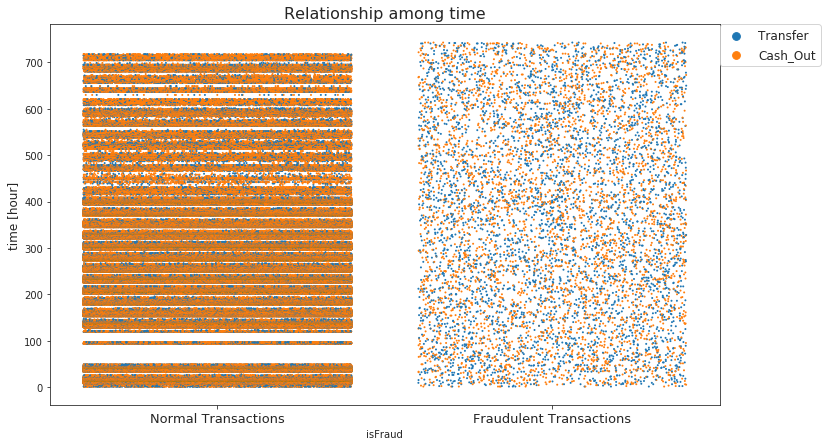

In [694]:
ax = plotTime(F[:timepic], focus.step[:timepic], focus.type[:timepic])
ax.set_ylabel('time [hour]', size = 12)
ax.set_title('Relationship among time', size = 16);

It is clear that fradulent transactions are  distributed more homogenously over time compared to normal transactions.\
The "CASH_OUT" in Normal Transactions are much more larger than in Fraudulent Transactions.

### 3.7.3 Explore the new features "errorBalanceDest". (follow 4.1)

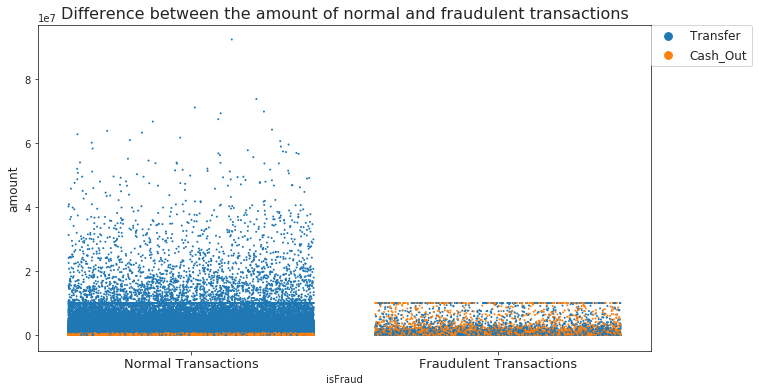

In [695]:
timepic = len(focus)
ax = plotTime(F[:timepic], focus.amount[:timepic], focus.type[:timepic], figsize = (11,6))
ax.set_ylabel('amount', size = 12)
ax.set_title('Difference between the amount of normal and fraudulent transactions', size = 16);

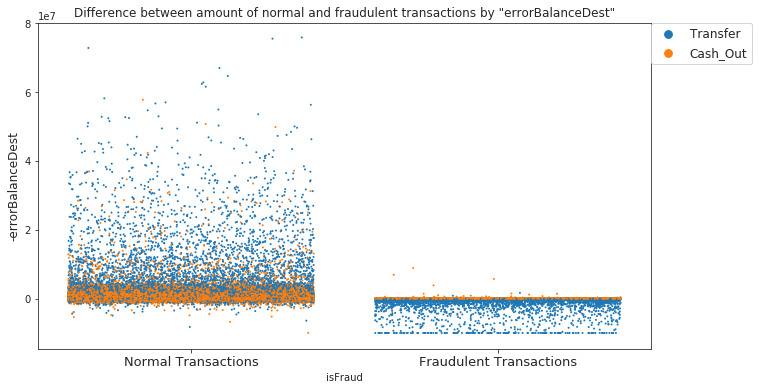

In [696]:
focus['errorBalanceOrig'] = focus.newBalanceOrig + focus.amount - focus.oldBalanceOrig
focus['errorBalanceDest'] = focus.oldBalanceDest + focus.amount - focus.newBalanceDest

timepic = len(focus)
ax = plotTime(F[:timepic], -focus.errorBalanceDest[:timepic], focus.type[:timepic], figsize = (11,6))
ax.set_ylabel('-errorBalanceDest', size = 12)
ax.set_title('Difference between amount of normal and fraudulent transactions by "errorBalanceDest"', size = 12);

From these two graphs, we can find that using the "errorBalanceDest" as filter is a good way to distinguish the normal and fraudulent transactions.

### 3.7.4 Heat Map to show the correlation.

From the heat map, we can find the correlation between different variables.

In [697]:
focusFraud = focus.loc[F == 1]
focusNotFraud = focus.loc[F == 0] #update

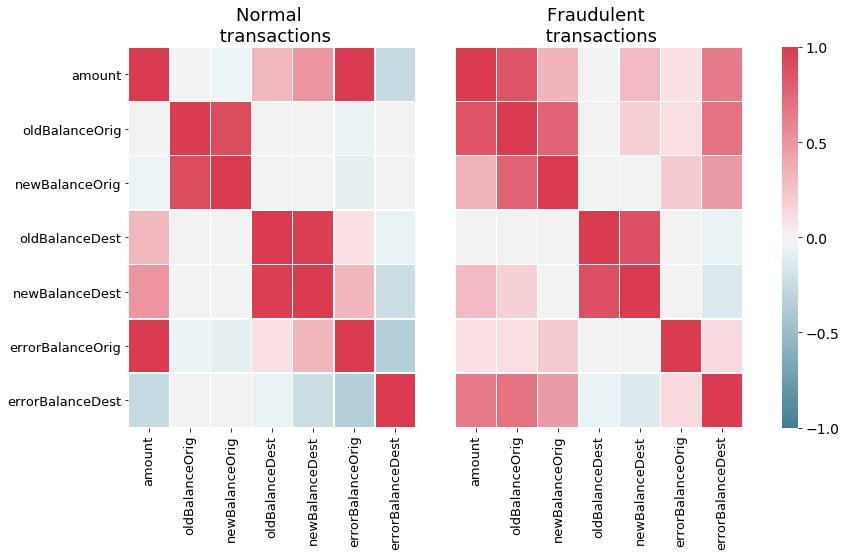

In [698]:
correlationNotFraud = focusNotFraud.loc[:, focus.columns != 'step'].corr()

grid_kws = {"width_ratios": (0.9, 0.9, 0.05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (12, 7))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNotFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 13); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 13); 
ax1.set_title('Normal \n transactions', size = 18)

correlationFraud = focusFraud.loc[:, focus.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 13); 
ax2.set_title('Fraudulent \n transactions', size = 18);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

Adding mask.

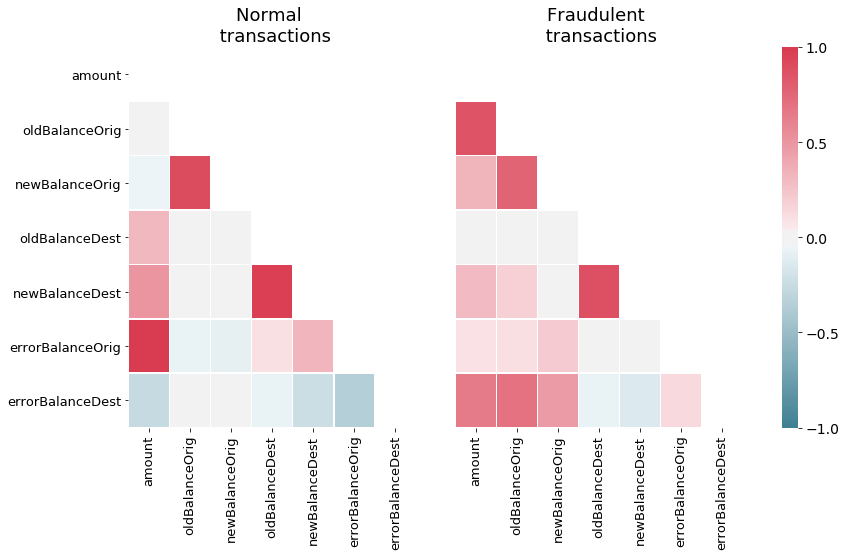

In [699]:
correlationNotFraud = focusNotFraud.loc[:, focus.columns != 'step'].corr()

mask = np.zeros_like(correlationNotFraud)
indices = np.triu_indices_from(correlationNotFraud)
mask[indices] = True

grid_kws = {"width_ratios": (0.9, 0.9, 0.05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (12, 7))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNotFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 13); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 13); 
ax1.set_title('Normal \n transactions', size = 18)

correlationFraud = focusFraud.loc[:, focus.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5,  mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 13); 
ax2.set_title('Fraudulent \n transactions', size = 18);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

Let's see some obvious correlations.

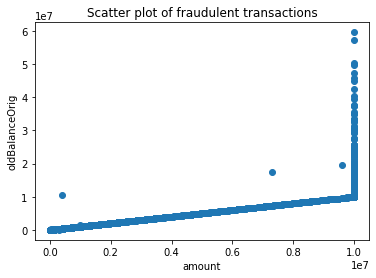

In [700]:
plt.scatter(x=focusFraud.amount[:len(focusFraud)], y=focusFraud.oldBalanceOrig[:len(focusFraud)])
plt.title('Scatter plot of fraudulent transactions')
plt.ylabel('oldBalanceOrig')
plt.xlabel('amount')
plt.show()

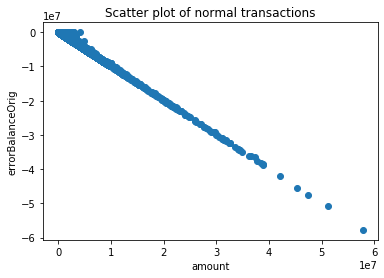

In [701]:
plt.scatter(x=focusNotFraud.amount[:len(focusNotFraud)], y=-focusNotFraud.errorBalanceOrig[:len(focusNotFraud)])
plt.title('Scatter plot of normal transactions')
plt.xlabel('amount')
plt.ylabel('errorBalanceOrig')
plt.show()

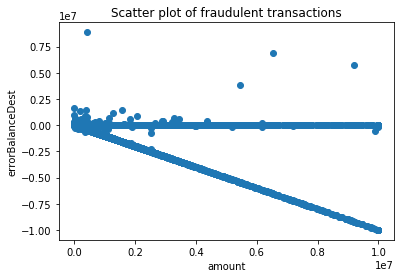

In [53]:
plt.scatter(x=focusFraud.amount[:len(focusFraud)], y=-focusFraud.errorBalanceDest[:len(focusFraud)])
plt.title('Scatter plot of fraudulent transactions')
plt.xlabel('amount')
plt.ylabel('errorBalanceDest')
plt.show()

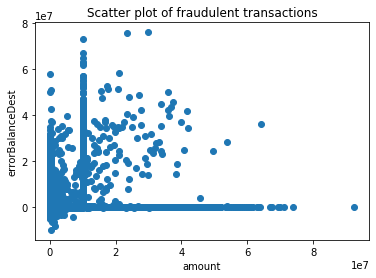

In [54]:
plt.scatter(x=focusNotFraud.amount[:len(focusNotFraud)], y=-focusNotFraud.errorBalanceDest[:len(focusNotFraud)])
plt.title('Scatter plot of fraudulent transactions')
plt.xlabel('amount')
plt.ylabel('errorBalanceDest')
plt.show()

We can find things by comparing between the normal and fraudulent transactions.\
For example, there are obvious differences in "errorBalanceDest" between these two categories.

 # 4. Data Cleaning and Feature Engineering
 Check for missing data.<br>
 Check for illegal data, such as negative balance.<br>


 ## 4.1 Missing Data

In this part I will test if there is any missing values in this DataFrame. 

And we can check in details.

In [702]:
n_missing = payment.isna().sum()
print('Number of missing data:\n{}'.format(n_missing))
# use SimpleImputer to fill the NA in numerical features
# the amount of money distributes extremely uneven,
# so we use "median" strategy to fill numerical missing values.
# and we will use "most_frequent" strategy to fill categorical missing values.
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_features = ['amount', 'oldBalanceOrig', 'newBalanceOrig',
                      'oldBalanceDest', 'newBalanceDest']
categorical_features = ['type', 'isFlaggedFraud']

for feature in numerical_features:
    if payment[feature].isna().sum() != 0:
        payment[feature] = num_imputer.fit_transform(payment[feature])

for feature in categorical_features:
    if payment[feature].isna().sum() != 0:
        payment[feature] = cat_imputer.fit_transform(payment[feature])

Number of missing data:
step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [703]:
payment.isnull().values.any()

False

 ## 4.2 Illegal Data

I define the "illegal" (means balance < 0) and I plan to drop those rows that contain "illegal" part.

In [704]:
balance_cols = ['oldBalanceOrig', 'newBalanceOrig',
                'oldBalanceDest', 'newBalanceDest']
print('Number of wrong balance:\n{}'.format((payment[balance_cols] < 0).sum()))

n_illegals_per_row = (payment[balance_cols] < 0).sum(axis=1)
illegal_rows = n_illegals_per_row[n_illegals_per_row > 0]
# drop illegal rows
payment.drop(illegal_rows, axis=0, inplace=True)

Number of wrong balance:
oldBalanceOrig    0
newBalanceOrig    0
oldBalanceDest    0
newBalanceDest    0
dtype: int64


 ## 4.3 Categorical Features
 `type` is a categorical feature,
 it needs to be transformed into numerical values first.<br>
 We use LabelEncoder in scikit-learn to do this.


In [15]:
encoder = LabelEncoder()
payment['type_lb'] = encoder.fit_transform(payment['type'])

## 4.4 Drop useless column

In [16]:
payment.drop(['nameOrig', 'nameDest','isFlaggedFraud'], inplace=True, axis=1)

 ## 4.5 Add new features
 The amount is not always equals to balance difference


In [17]:
# difference of balance
balance_diff_orig = payment['oldBalanceOrig'] - payment['newBalanceOrig']
balance_diff_dest = payment['newBalanceDest'] - payment['oldBalanceDest']

# difference between (balance diff) and amount record
amount_diff_orig = payment['amount'] - balance_diff_orig
amount_diff_dest = payment['amount'] - balance_diff_dest

# display records with error
print('Data with amount error:')
try:
    display(payment[amount_diff_orig > 0.01])
except:
    print(payment[amount_diff_orig > 0.01])

# add to dataset
payment['errorBalanceOrig'] = amount_diff_orig
payment['errorBalanceDest'] = amount_diff_dest
payment['errorBalanceOrigAbs'] = amount_diff_orig.abs()
payment['errorBalanceDestAbs'] = amount_diff_dest.abs()


Data with amount error:


,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,type_lb
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0,3
10,1,DEBIT,9644.94,4465.00,0.00,10845.00,157982.12,0,2
13,1,PAYMENT,11633.76,10127.00,0.00,0.00,0.00,0,3
15,1,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,1
16,1,PAYMENT,1563.82,450.00,0.00,0.00,0.00,0,3
19,1,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,4
24,1,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0,4
25,1,PAYMENT,6061.13,443.00,0.00,0.00,0.00,0,3
28,1,PAYMENT,8901.99,2958.91,0.00,0.00,0.00,0,3
29,1,PAYMENT,9920.52,0.00,0.00,0.00,0.00,0,3


In [708]:
payment

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,type_lb,errorBalanceOrig,errorBalanceDest,errorBalanceOrigAbs,errorBalanceDestAbs
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,3,-1.455192e-11,9.839640e+03,1.455192e-11,9.839640e+03
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,3,1.136868e-12,1.864280e+03,1.136868e-12,1.864280e+03
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,4,0.000000e+00,1.810000e+02,0.000000e+00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,1,0.000000e+00,2.136300e+04,0.000000e+00,2.136300e+04
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,3,0.000000e+00,1.166814e+04,0.000000e+00,1.166814e+04
5,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,3,9.094947e-13,7.817710e+03,9.094947e-13,7.817710e+03
6,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,3,1.091394e-11,7.107770e+03,1.091394e-11,7.107770e+03
7,1,PAYMENT,7861.64,176087.23,168225.59,0.00,0.00,0,3,-1.364242e-11,7.861640e+03,1.364242e-11,7.861640e+03
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0,3,1.353360e+03,4.024360e+03,1.353360e+03,4.024360e+03
9,1,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0,2,3.637979e-12,6.886980e+03,3.637979e-12,6.886980e+03


 # 4. Data Visualization


## 4.1 Distribution of every feature

At first we can have a whole picture of all of our data.

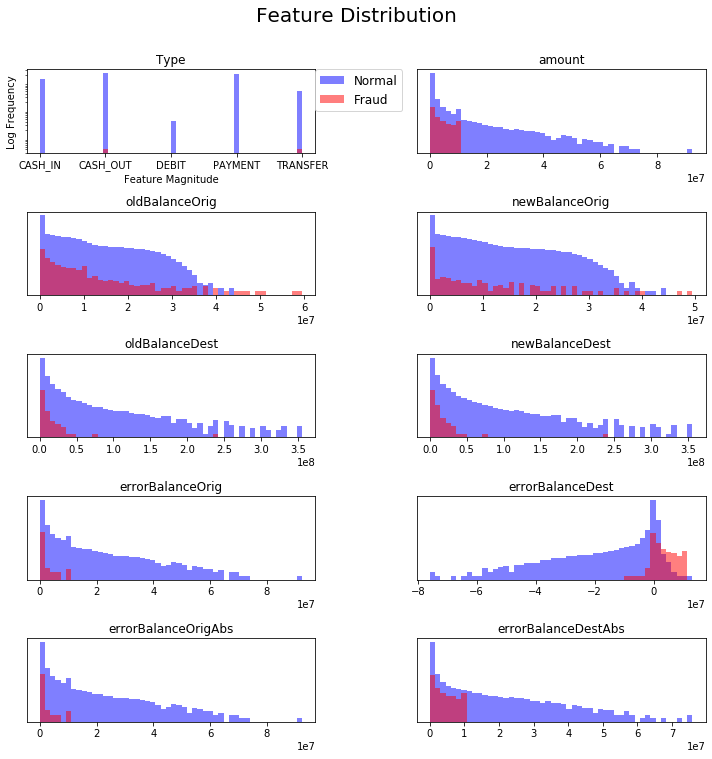

In [709]:
selected_cols = ['type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest',
                 'errorBalanceOrig','errorBalanceDest',
                 'errorBalanceOrigAbs','errorBalanceDestAbs']

fraud = payment[payment['isFraud'] == 1].copy()
nonfraud = payment[payment['isFraud'] == 0].copy()

fig, axes = plt.subplots(len(selected_cols)//2, 2, figsize=(10, 10))
fig.suptitle('Feature Distribution', x=0.5, y=1.05, fontsize=20)
axx = axes.ravel()

# for each feature, plot histgram of both fraud data and nonfraud data
for i, feature in enumerate(selected_cols):
    _, bins = np.histogram(payment[feature], bins=50)
    axx[i].hist(nonfraud[feature], bins=bins, color='blue', alpha=.5)
    axx[i].hist(fraud[feature], bins=bins, color='red', alpha=.5)
    axx[i].set_title(feature)
    axx[i].semilogy()
    axx[i].set_yticks(())

axx[0].set_title('Type')
axx[0].set_xticks(range(len(encoder.classes_)))
axx[0].set_xticklabels(list(encoder.classes_))
axx[0].set_xlabel('Feature Magnitude')
axx[0].set_ylabel('Log Frequency')
axx[0].legend(['Normal', 'Fraud'], bbox_to_anchor=(1,1), loc=2, borderaxespad=0, fontsize = 12);
fig.tight_layout()
plt.show()

In this part, we can have a whole picture of the general situation in this dataset.\
We can see the trend and also compare the difference between the normal transactions and fraudulent transactions.\
From the bar chart, it proves again that the fraudulent transactions only happen in "TRANSFER" and "CASH_OUT"; the number of fraudulent transactions is smaller than the normal transactions.\
We surprise that the "errorBalanceDest" has a special relationship, which maybe a feature to distinguish fraudulent.

## 4.2 Categorical Scatter Plot

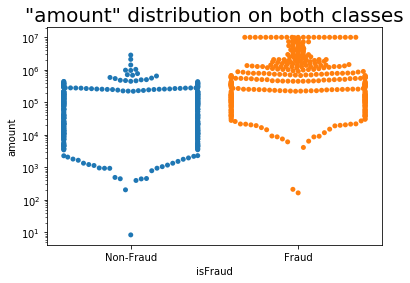

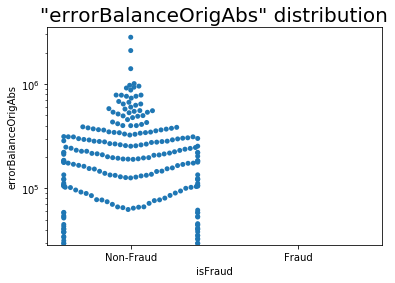

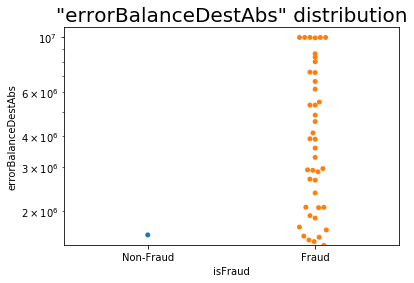

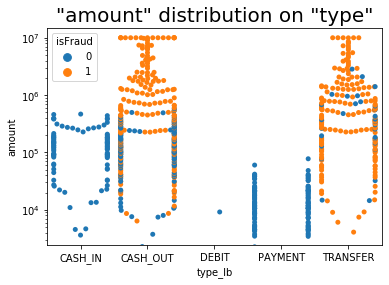

In [710]:
sample = pd.concat([fraud.sample(400, random_state=0), nonfraud.sample(400, random_state=0)], axis=0)

# "amount" distribution on both classes
sns.swarmplot(x=sample['isFraud'], y=sample['amount'], )
plt.title('"amount" distribution on both classes', fontsize=20)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.semilogy()
plt.show()

# "errorBalanceOrigAbs" distribution on both classes
sns.swarmplot(x=sample['isFraud'], y=sample['errorBalanceOrigAbs'], )
plt.title('"errorBalanceOrigAbs" distribution', fontsize=20)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.semilogy()
plt.show()

# "errorBalanceDestAbs" distribution on both classes
sns.swarmplot(x=sample['isFraud'], y=sample['errorBalanceDestAbs'], )
plt.title('"errorBalanceDestAbs" distribution', fontsize=20)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.semilogy()
plt.show()

# "amount" distribution on different "type"
sns.swarmplot(x=sample['type_lb'], y=sample['amount'], hue=sample['isFraud'])
plt.title('"amount" distribution on "type"', fontsize=20)
plt.xticks(range(len(encoder.classes_)), list(encoder.classes_))
plt.semilogy()
plt.show()


We can find something from the visualization graph above:
For example, fraud cases have larger maximum amount than non-fraud cases.
"CASH_OUT" and "TRANSFER" operations have larger transaction amount, and also have larger transaction number.

Fraud is more likely to happen when amount is unequal to the difference between old and new BalanceDest.(Receviers)
When the amount is not equal to the difference between old and new BalanceOrig(starters), it is more likely a normal transaction.)


In [711]:
print('The number of transactions have unequal amount with △BalanceOrig: {}'\
      .format((payment['errorBalanceOrigAbs'] > 0.01).sum()))
print('The number of transactions have unequal amount with △BalanceDest: {}'\
      .format((payment['errorBalanceDestAbs'] > 0.01).sum()))
print('The number of transactions have unequal amount with neither △BalanceOrig\
nor △BalanceDest: {}'.format(len(payment.query("errorBalanceDestAbs > 0.01 and errorBalanceOrigAbs > 0.001"))))

The number of transactions have unequal amount with △BalanceOrig: 5066425
The number of transactions have unequal amount with △BalanceDest: 4122111
The number of transactions have unequal amount with neither △BalanceOrignor △BalanceDest: 3121927


However, I think this dataset cannot represent all the situation. We cannot think that the fraud only happen in "CASH_OUT" and "TRANSFER". Now we are using this dataset to analysis and do training, so if a fraud happen in the other kind of transaction, this model may not predict it correctly.

 # 5. Model Selection
 I will use different combinations of features, to train our model and test performance.\
 I will compare different classification method.


In [19]:
def show_model_score(model, X_train, y_train, X_test, y_test, X_all=None, y_all=None):
    print('Model: {}'.format(model.__class__.__name__))
    train_score = model.score(X_train, y_train)
    print('  Accuracy on train set: {:.4f}'.format(train_score))
    test_score = model.score(X_test, y_test)
    print('  Accuracy on test set:  {:.4f}'.format(test_score))
    if X_all is not None:
        all_score = model.score(X_all, y_all)
        print('  Accuracy on all data:  {:.4f}'.format(all_score))
    else:
        all_score = 0
    return train_score, test_score, all_score


 ## 5.1 Adjusting Data
 In the original dataset, the number of non-Fraud cases is way larger than Fraud cases.
 If I use keep this class ratio to train our model, it will always predict new data to non-Fraud cases.\
 So, I have to find a proper way to use our data.


In [20]:
n_fraud = (payment['isFraud'] == 1).sum()
n_nonfraud = (payment['isFraud'] == 0).sum()

print('Number of fraud cases:    {}, {:.3%}'.format(
    n_fraud, n_fraud/len(payment)))
print('Number of nonfraud cases: {}, {:.3%}'.format(
    n_nonfraud, n_nonfraud/len(payment)))
print('Fraud / Non-fraud: {:.3}'.format(n_fraud / n_nonfraud))


Number of fraud cases:    8213, 0.129%
Number of nonfraud cases: 6354407, 99.871%
Fraud / Non-fraud: 0.00129


 To make things easier, I simply pick the same number of nonfraud cases as fraud ones,
 to train our model. \
 I will use the full dataset later.


In [21]:
# extract fraud and non-fraud rows
fraud = payment[payment['isFraud'] == 1]
nonfraud = payment[payment['isFraud'] == 0]

# get fraud and non-fraud row index
fraud_index = fraud.index
nonfraud_index = nonfraud.index

# take a random sample from non-fraud rows, which equals to fraud rows in amount
nonfraud_sample = nonfraud.sample(len(fraud), random_state=0)

# concat both fraud and non-fraud rows to from a new dataset
payment_balance_sample = pd.concat([fraud, nonfraud_sample], axis=0)

try:
    display(payment_balance_sample)
    display(payment_balance_sample.describe())
except:
    print(payment_balance_sample)
    print(payment_balance_sample.describe())



,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,type_lb,errorBalanceOrig,errorBalanceDest,errorBalanceOrigAbs,errorBalanceDestAbs
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,4,0.000000e+00,1.810000e+02,0.000000e+00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,1,0.000000e+00,2.136300e+04,0.000000e+00,2.136300e+04
251,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1,4,0.000000e+00,2.806000e+03,0.000000e+00,2.806000e+03
252,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1,1,0.000000e+00,2.900800e+04,0.000000e+00,2.900800e+04
680,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1,4,0.000000e+00,2.012800e+04,0.000000e+00,2.012800e+04
681,1,CASH_OUT,20128.00,20128.00,0.00,6268.00,12145.85,1,1,0.000000e+00,1.425015e+04,0.000000e+00,1.425015e+04
724,1,CASH_OUT,416001.33,0.00,0.00,102.00,9291619.62,1,1,4.160013e+05,-8.875516e+06,4.160013e+05,8.875516e+06
969,1,TRANSFER,1277212.77,1277212.77,0.00,0.00,0.00,1,4,0.000000e+00,1.277213e+06,0.000000e+00,1.277213e+06
970,1,CASH_OUT,1277212.77,1277212.77,0.00,0.00,2444985.19,1,1,0.000000e+00,-1.167772e+06,0.000000e+00,1.167772e+06
1115,1,TRANSFER,35063.63,35063.63,0.00,0.00,0.00,1,4,0.000000e+00,3.506363e+04,0.000000e+00,3.506363e+04


,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,type_lb,errorBalanceOrig,errorBalanceDest,errorBalanceOrigAbs,errorBalanceDestAbs
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04
mean,306.763850,8.201540e+05,1.245401e+06,5.286141e+05,8.603087e+05,1.285583e+06,0.500000,2.094667,1.033668e+05,3.948797e+05,1.033668e+05,4.185553e+05
std,193.584036,1.860112e+06,3.250161e+06,2.501223e+06,4.355745e+06,4.651907e+06,0.500015,1.479969,4.487325e+05,1.379924e+06,4.487325e+05,1.372927e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000e-02,-1.291212e+07,0.000000e+00,0.000000e+00
25%,161.000000,3.712309e+04,1.008625e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.365575e-11
50%,283.000000,1.729433e+05,1.196647e+05,0.000000e+00,0.000000e+00,1.295114e+05,0.500000,1.000000,0.000000e+00,3.204210e+03,0.000000e+00,5.445070e+03
75%,410.000000,5.396587e+05,7.995173e+05,0.000000e+00,5.238782e+05,1.097807e+06,1.000000,4.000000,7.287907e+04,1.717691e+05,7.287907e+04,1.941359e+05
max,743.000000,2.623419e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,4.000000,2.623419e+07,1.000000e+07,2.623419e+07,1.291212e+07


 ## 5.2 Comparison of DecisionTree and LogisticRegression
 I use only numerical features to make this comparison


In [22]:
# new balance can be calculated by amount and old balance, so use old balance only.
selected_cols = ['step','amount', 'oldBalanceOrig','oldBalanceDest']
X = payment_balance_sample[selected_cols]
y = payment_balance_sample['isFraud']

# split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# before training the LogisticRegression model, we need to normalize the data
# tree models don't need to do this.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train both model
logreg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# compare performance of both model
show_model_score(logreg, X_train_scaled, y_train, X_test_scaled, y_test,
                 scaler.transform(payment[selected_cols]), payment['isFraud'])
show_model_score(tree, X_train, y_train, X_test, y_test,
                 payment[selected_cols], payment['isFraud'])

print('\nThe Decision Tree model is much better than Logistic Regression in this dataset.')


Model: LogisticRegression
  Accuracy on train set: 0.7825
  Accuracy on test set:  0.7933
  Accuracy on all data:  0.8742
Model: DecisionTreeClassifier
  Accuracy on train set: 1.0000
  Accuracy on test set:  0.9635
  Accuracy on all data:  0.9548

The Decision Tree model is much better than Logistic Regression in this dataset.


 ## 5.3 Feature Selection


 ### 5.3.1 Use all numerical features


In [23]:
selected_cols = ['step','amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest']

X = payment_balance_sample[selected_cols]
y = payment_balance_sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

print('Use numerical features')
show_model_score(model, X_train, y_train, X_test, y_test,
                 payment[selected_cols], payment['isFraud'])



Use numerical features
Model: DecisionTreeClassifier
  Accuracy on train set: 1.0000
  Accuracy on test set:  0.9844
  Accuracy on all data:  0.9832


(1.0, 0.9844168492817141, 0.9832330077861007)

 ### 5.3.2 Use all features
 However the name features and those useless (dropped) will not be used.


In [24]:
selected_cols = ['step','type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

X = payment_balance_sample[selected_cols]
y = payment_balance_sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

print('Use all features')
show_model_score(model, X_train, y_train, X_test, y_test,
                 payment[selected_cols], payment['isFraud'])

print('\nDecision Tree model achieves a high accuracy using all features.')



Use all features
Model: DecisionTreeClassifier
  Accuracy on train set: 1.0000
  Accuracy on test set:  0.9976
  Accuracy on all data:  0.9969

Decision Tree model achieves a high accuracy using all features.


 ## 5.4 Improving Model


 ### 5.4.1 Pre-pruning
 I did not give any constraint on our DecisionTree model, so it will go as deep as possible,
 until train set accuracy is 100% (if possible).\
 But this is a symbol of overfitting. In order to improve generalization performance,
 I can do some pruning to prevent it from overfitting.


In [25]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

X = payment_balance_sample[selected_cols]
y = payment_balance_sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for max_depth in range(1, 10):
    model = DecisionTreeClassifier(
        max_depth=max_depth, random_state=0).fit(X_train, y_train)
    print('\nmax_depth: {}'.format(max_depth))
    show_model_score(model, X_train, y_train, X_test, y_test,
                     payment[selected_cols], payment['isFraud'])




max_depth: 1
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9056
  Accuracy on test set:  0.9036
  Accuracy on all data:  0.8068

max_depth: 2
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9887
  Accuracy on test set:  0.9890
  Accuracy on all data:  0.9988

max_depth: 3
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9980
  Accuracy on test set:  0.9978
  Accuracy on all data:  0.9997

max_depth: 4
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9981
  Accuracy on test set:  0.9976
  Accuracy on all data:  0.9996

max_depth: 5
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9982
  Accuracy on test set:  0.9976
  Accuracy on all data:  0.9993

max_depth: 6
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9984
  Accuracy on test set:  0.9976
  Accuracy on all data:  0.9992

max_depth: 7
Model: DecisionTreeClassifier
  Accuracy on train set: 0.9991
  Accuracy on test set:  0.9981
  Accuracy on all data:  0.9986

max_depth: 8
Model:

### 5.4.2 Features importance:

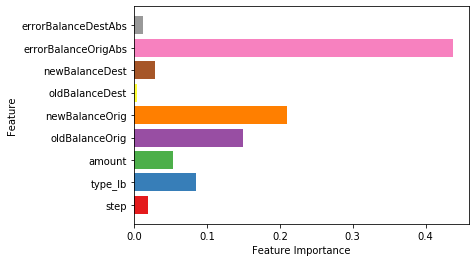

In [38]:
def plot_feature_importance(model):
    colors = plt.cm.Set1(np.linspace(0, 1, 9))
    n_features = len(selected_cols)
    plt.figure()
    plt.barh(range(n_features), model.feature_importances_, align = 'center', color = colors)
    plt.yticks(np.arange(n_features), selected_cols)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    
plot_feature_importance(model)

 ### 5.4.3 RandomForestClassifier
 Single Decision Tree is limited in many aspects.<br>
 Use many decision trees combined can reduce overfitting and
 give better generalization performance.<br>
 This is also called a random forest.


In [26]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

X = payment_balance_sample[selected_cols].copy()
y = payment_balance_sample['isFraud'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier(n_estimators=20, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

show_model_score(model, X_train, y_train, X_test, y_test,
                 payment[selected_cols], payment['isFraud'])

print("Until now we only used a small part of the data.")
print('In the next section we will use the full dataset to build a RandomForest.')


Model: RandomForestClassifier
  Accuracy on train set: 0.9999
  Accuracy on test set:  0.9983
  Accuracy on all data:  0.9996
Until now we only used a small part of the data.
In the next section we will use the full dataset to build a RandomForest.


 # 6. RandomForestClassifier on Full Dataset
 In previous process we only use 1/1000 data, now I will use more of them.<br>
 I will build 1000 decision trees using different data sampled from full dataset.


 ## 6.1 Self-defined random forest classifier


In [464]:
class MyForest(object):

    def __init__(self, n_estimators, random_states=None, **kwargs):
        self.n_estimators = n_estimators
        if not isinstance(random_states, Iterable):
            random_states = [random_states] * n_estimators
        self.trees = [DecisionTreeClassifier(
            random_state=random_states[i], **kwargs) for i in range(n_estimators)]

    def fit(self, *args, **kwargs):
        raise NotImplementedError('Please use fit_i on single tree instead.')

    def fit_i(self, X, y, i):
        self.trees[i].fit(X, y)
        return self

    def predict(self, X):
        y_pred = np.zeros(len(X), dtype=int)
        for i, tree in enumerate(self.trees):
            y_pred += tree.predict(X)

        y_pred = (y_pred > (self.n_estimators / 2)).astype(int)
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        score = (y_pred == y).sum() / len(y)
        return score



 ## 6.2 Train Test Split on Full Data
 Take 1/10 from fraud cases into test case,
 and the same amount from nonfraud cases.<br>
 The rest data are used to train model.


In [465]:

# take 1/10 from fraud cases as test case
# and the same amount from nonfraud cases
fraud_test_index = random.sample(list(fraud_index), n_fraud // 10)
nonfraud_test_index = random.sample(list(nonfraud_index), n_fraud // 10)

# drop test cases from full cases, we get train cases
fraud_train_index = fraud_index.drop(fraud_test_index)
nonfraud_train_index = nonfraud_index.drop(nonfraud_test_index)

fraud_train = payment.loc[fraud_train_index].copy()
nonfraud_train = payment.loc[nonfraud_train_index].copy()

n_fraud_train = len(fraud_train)


 ## 6.3 Model Training
 For each tree in MyForest, use the full fraud train set and
 a same-size sample from non-fraud train set to train it.


In [644]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

n_estimators = 20
my_forest = MyForest(n_estimators, random_states=range(n_estimators))

final_model = my_forest

for i in range(n_estimators):
    train_data_i = pd.concat(
        [fraud_train, nonfraud_train.sample(n_fraud_train, random_state=i)])
    X_train_i = train_data_i[selected_cols]
    y_train_i = train_data_i['isFraud']

    my_forest.fit_i(X_train_i, y_train_i, i)

# performance
train_data = pd.concat([fraud_train, nonfraud_train], axis=0)
X_train = train_data[selected_cols]
y_train = train_data['isFraud']

test_data = payment.loc[fraud_test_index + nonfraud_test_index]
X_test = test_data[selected_cols]
y_test = test_data['isFraud']

show_model_score(my_forest, X_train, y_train, X_test, y_test)


Model: MyForest
  Accuracy on train set: 0.9992
  Accuracy on test set:  0.9976


(0.9991941490758182, 0.997563946406821, 0)

 ## 6.4 Parameter Optimization
 Find the best values for n_estimators and other parameters.<br>
 This section takes long times to run, and the improvement is limited.<br>
 ** It's alright to skip this section. **


 ### 6.4.1 Optimizating n_estimators


n_estimators: 10
Model: MyForest
  Accuracy on train set: 0.9993
  Accuracy on test set:  0.9976
n_estimators: 20
Model: MyForest
  Accuracy on train set: 0.9992
  Accuracy on test set:  0.9976
n_estimators: 30
Model: MyForest
  Accuracy on train set: 0.9993
  Accuracy on test set:  0.9976
n_estimators: 40
Model: MyForest
  Accuracy on train set: 0.9993
  Accuracy on test set:  0.9976
n_estimators: 50
Model: MyForest
  Accuracy on train set: 0.9993
  Accuracy on test set:  0.9976
n_estimators: 60
Model: MyForest
  Accuracy on train set: 0.9994
  Accuracy on test set:  0.9976


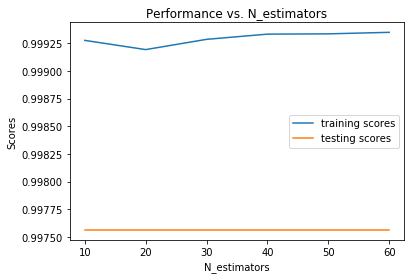

In [645]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

train_data = pd.concat([fraud_train, nonfraud_train], axis=0)
X_train = train_data[selected_cols]
y_train = train_data['isFraud']

test_data = payment.loc[fraud_test_index + nonfraud_test_index]
X_test = test_data[selected_cols]
y_test = test_data['isFraud']

n_estimator_range = range(10, 61, 10)
train_scores = []
test_scores = []

for n_estimators in n_estimator_range:
    print('n_estimators: {}'.format(n_estimators))
    my_forest = MyForest(n_estimators, random_states=range(n_estimators))

    for i in range(n_estimators):
        train_data_i = pd.concat(
            [fraud_train, nonfraud_train.sample(n_fraud_train, random_state=i)])
        X_train_i = train_data_i[selected_cols]
        y_train_i = train_data_i['isFraud']

        my_forest.fit_i(X_train_i, y_train_i, i)

    train_score, test_score, _ = show_model_score(
        my_forest, X_train, y_train, X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.title('Performance vs. N_estimators')
plt.plot(n_estimator_range, train_scores, label='training scores')
plt.plot(n_estimator_range, test_scores, label='testing scores')
plt.xlabel('N_estimators')
plt.ylabel('Scores')
plt.xticks(n_estimator_range)
plt.legend()
plt.show()


 ### 6.4.2 Optimizating max_depth


max_depth: 3
Model: MyForest
  Accuracy on train set: 0.9999
  Accuracy on test set:  0.9970
max_depth: 4
Model: MyForest
  Accuracy on train set: 0.9998
  Accuracy on test set:  0.9970
max_depth: 5
Model: MyForest
  Accuracy on train set: 0.9998
  Accuracy on test set:  0.9963
max_depth: 6
Model: MyForest
  Accuracy on train set: 0.9997
  Accuracy on test set:  0.9970
max_depth: 7
Model: MyForest
  Accuracy on train set: 0.9996
  Accuracy on test set:  0.9970
max_depth: 8
Model: MyForest
  Accuracy on train set: 0.9994
  Accuracy on test set:  0.9976
max_depth: 9
Model: MyForest
  Accuracy on train set: 0.9994
  Accuracy on test set:  0.9976
max_depth: 10
Model: MyForest
  Accuracy on train set: 0.9993
  Accuracy on test set:  0.9970
max_depth: 11
Model: MyForest
  Accuracy on train set: 0.9992
  Accuracy on test set:  0.9970
max_depth: 12
Model: MyForest
  Accuracy on train set: 0.9992
  Accuracy on test set:  0.9970
max_depth: 13
Model: MyForest
  Accuracy on train set: 0.9992
  Acc

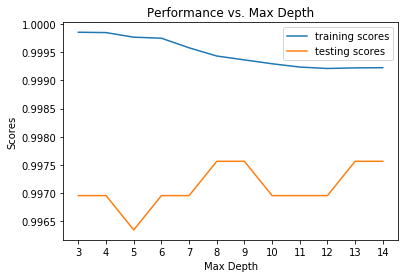

In [646]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

train_data = pd.concat([fraud_train, nonfraud_train], axis=0)
X_train = train_data[selected_cols]
y_train = train_data['isFraud']

test_data = payment.loc[fraud_test_index + nonfraud_test_index]
X_test = test_data[selected_cols]
y_test = test_data['isFraud']

max_depth_range = range(3, 15, 1)
train_scores = []
test_scores = []
n_estimators = 20

for max_depth in max_depth_range:
    print('max_depth: {}'.format(max_depth))
    my_forest = MyForest(n_estimators,
                         random_states=range(n_estimators),
                         max_depth=max_depth)

    for i in range(n_estimators):
        train_data_i = pd.concat(
            [fraud_train, nonfraud_train.sample(n_fraud_train, random_state=i)])
        X_train_i = train_data_i[selected_cols]
        y_train_i = train_data_i['isFraud']

        my_forest.fit_i(X_train_i, y_train_i, i)

    train_score, test_score, _ = show_model_score(
        my_forest, X_train, y_train, X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.title('Performance vs. Max Depth')
plt.plot(max_depth_range, train_scores, label='training scores')
plt.plot(max_depth_range, test_scores, label='testing scores')
plt.xlabel('Max Depth')
plt.ylabel('Scores')
plt.xticks(max_depth_range)
plt.legend()
plt.show()


 # 7. Model Visualization
 Visualize part of the MyForest and save to pdf files.<br>


In [648]:
selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

for i in range(2):
    dot_data = StringIO()
    tree = final_model.trees[i]

    export_graphviz(tree, out_file=dot_data, class_names=['Non-Fraud', 'Fraud'],
                    feature_names=selected_cols, impurity=False, filled=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf("tree{}.pdf".format(i))



In [649]:
# # Trees in previous model are too deep to visualize,
# so we build a smaller tree to visualize.

selected_cols = ['step', 'type_lb', 'amount', 'oldBalanceOrig', 'newBalanceOrig',
                 'oldBalanceDest', 'newBalanceDest', 'errorBalanceOrigAbs', 'errorBalanceDestAbs']

n_estimators = 10
simple_forest = MyForest(n_estimators,
                         random_states=range(n_estimators),
                         max_depth=3)


for i in range(n_estimators):
    train_data_i = pd.concat(
        [fraud_train, nonfraud_train.sample(n_fraud_train, random_state=i)])
    X_train_i = train_data_i[selected_cols]
    y_train_i = train_data_i['isFraud']

    simple_forest.fit_i(X_train_i, y_train_i, i)

for i in range(2):
    dot_data = StringIO()
    tree = simple_forest.trees[i]

    export_graphviz(tree, out_file=dot_data, class_names=['Non-Fraud', 'Fraud'],
                    feature_names=selected_cols, impurity=False, filled=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf("simple_tree{}.pdf".format(i))

